# Imports

In [30]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Reading the file

In [31]:
gnd = pd.read_csv("gender_classification.csv")
df = gnd.copy()
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


# This data set contains 7 numeric variables and 1 categorical variable.Dependent variable is gender, others are independent variable.

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
long_hair,5001.0,0.869626,0.336748,0.0,1.0,1.0,1.0,1.0
forehead_width_cm,5001.0,13.181484,1.107128,11.4,12.2,13.1,14.0,15.5
forehead_height_cm,5001.0,5.946311,0.541268,5.1,5.5,5.9,6.4,7.1
nose_wide,5001.0,0.493901,0.500013,0.0,0.0,0.0,1.0,1.0
nose_long,5001.0,0.507898,0.499988,0.0,0.0,1.0,1.0,1.0
lips_thin,5001.0,0.493101,0.500002,0.0,0.0,0.0,1.0,1.0
distance_nose_to_lip_long,5001.0,0.498900,0.500049,0.0,0.0,0.0,1.0,1.0


# Let's examine the variables now. I'll loop for it

In [47]:
def numeric(variable):
    
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution of the variable".format(variable))
    plt.show()

In [48]:
list = ["long_hair","forehead_width_cm","forehead_height_cm","nose_wide",
        "nose_long","lips_thin","distance_nose_to_lip_long"]

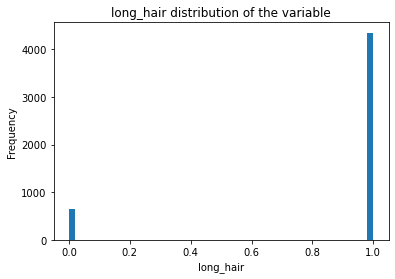

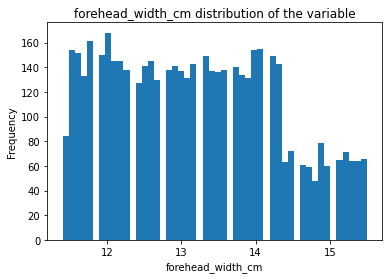

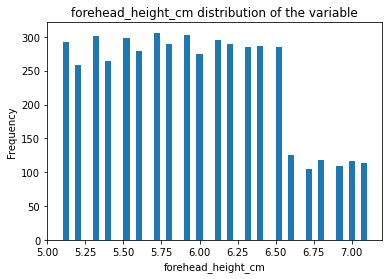

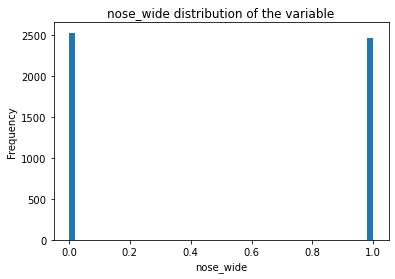

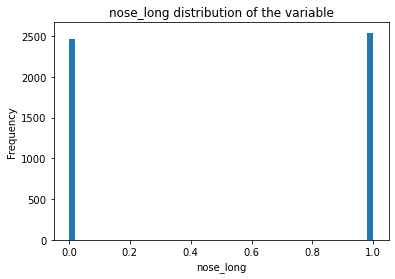

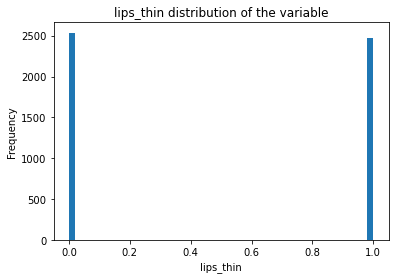

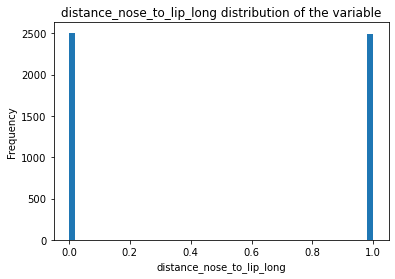

In [43]:
for i in list:
    numeric(i)

In [37]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

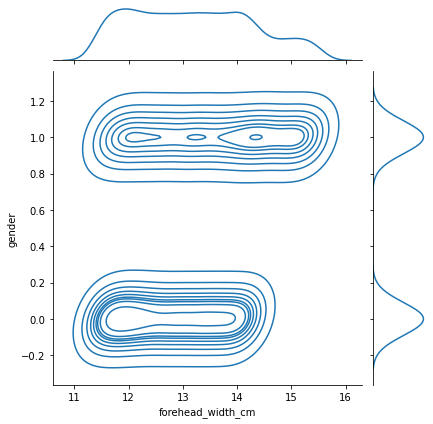

In [38]:
sns.jointplot("forehead_width_cm", "gender", data = df, kind = "kde")

# Men's head width is more messy than women and women's fore head width concentrated at 12 cm

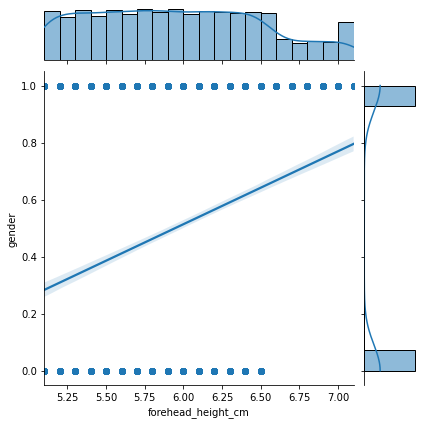

In [39]:
sns.jointplot("forehead_height_cm", "gender", data = df, kind = "reg")

# Head height is shorter in women.

<AxesSubplot:xlabel='forehead_width_cm', ylabel='forehead_height_cm'>

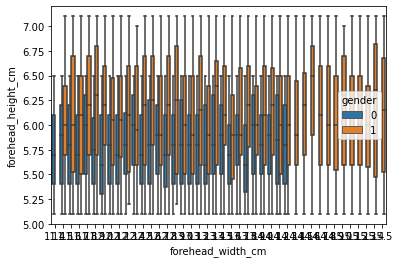

In [12]:
sns.boxplot(x = "forehead_width_cm", y = "forehead_height_cm", data = df, hue = "gender")

# Correlation analysis

In [13]:
df_corr = df.corr()

<AxesSubplot:>

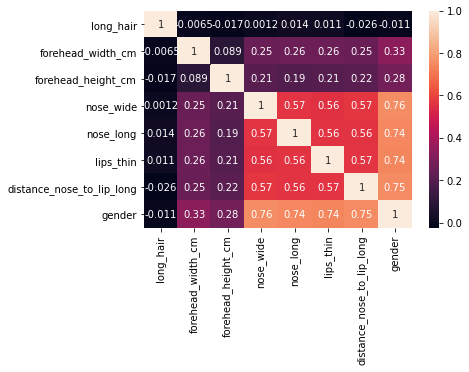

In [14]:
sns.heatmap(df_corr,annot = True)

# What we need to understand from this is that if the correlation coefficient is close to -1 or 1, there is a strong relationship between the variables.

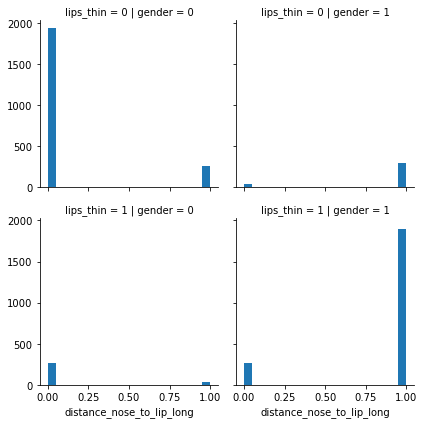

In [15]:
f = sns.FacetGrid(df, row = "lips_thin", col = "gender")
f.map(plt.hist, "distance_nose_to_lip_long", bins = 20)

# Outlier detection

In [16]:
def outlier(variable):
    
    sns.boxplot(df[variable])
    plt.show()
      

In [17]:
list1 = ["forehead_width_cm","forehead_height_cm"]

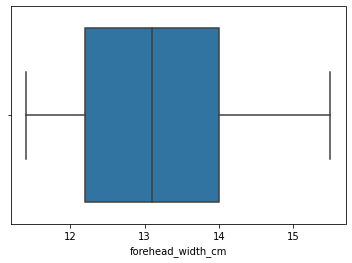

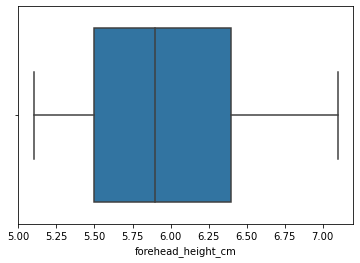

In [40]:
for i in list1:
    outlier(i)

# No outlier value in data set

# Missing values

In [28]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

# no missing value in data set